<a href="https://colab.research.google.com/github/mertydn/Data_Science_Homeworks/blob/main/Homework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Import library for splitting the dataset into train and test.
from sklearn.model_selection import train_test_split

#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.25)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)

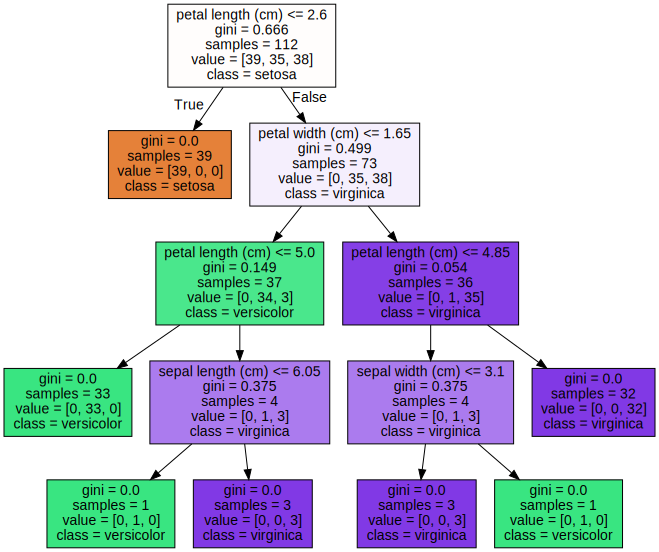

In [3]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [4]:
y_pred = clf.predict(X_test)
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data (using Default criterionas gini):  1.0
Accuracy Score on test data (using Default criterionas gini):  0.9473684210526315


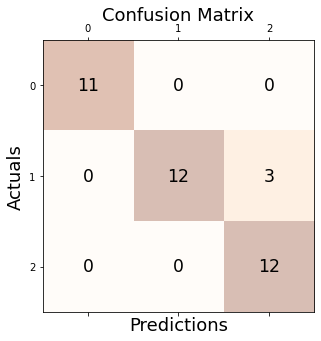

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [6]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average='micro'))

Precision: 0.921
Recall: 0.921
Accuracy: 0.921
F1 Score: 0.921


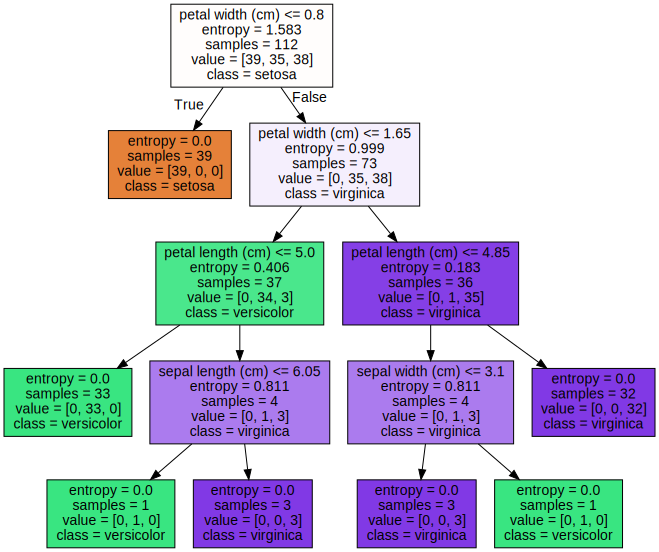

In [7]:
#PART 2
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
clf_entropy.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred_entropy =  clf_entropy.predict(X_test)

import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [8]:
print('Precision for entropy: %.3f' % precision_score(y_test, y_pred_entropy, average='micro'))
print('Recall for entropy: %.3f' % recall_score(y_test, y_pred_entropy, average='micro'))
print('Accuracy for entropy: %.3f' % accuracy_score(y_test, y_pred_entropy))
print('F1 Score for entropy: %.3f' % f1_score(y_test, y_pred_entropy, average='micro'))

Precision for entropy: 0.947
Recall for entropy: 0.947
Accuracy for entropy: 0.947
F1 Score for entropy: 0.947


In [ ]:
# 1. What is Information gain?
# Information gain is used for determining the best features/attributes that render maximum information about a class. 
# It follows the concept of entropy while aiming at decreasing the level of entropy, beginning from the root node to the leaf nodes.  
# Information gain computes the difference between entropy before and after split and specifies the impurity in class elements. 
#
# 2. What is Gini index?
# The gini index computes the degree of probability of a specific variable that is wrongly being classified when chosen randomly and a variation of gini coefficient. 
# It works on categorical variables, provides outcomes either be “successful” or “failure” and hence conducts binary splitting only.
#
# 3. What is Entropy?
# Entropy is the degree of uncertainty, impurity or disorder of a random variable, or a measure of purity. 
# It characterizes the impurity of an arbitrary class of examples. 
# Entropy is the measurement of impurities or randomness in the data points.
#
# 4. What is a confusion matrix?
# A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known
#
# 5. What is accuracy?
#
# 6. What is precision?
#
# 7. What is recall?
#
# 8. What is f-1 score?
#